In [3]:
library(dplyr)
library(ggfortify)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [4]:
# load the experiment design
doe <- read.csv("nolh-description.csv", header = TRUE)
# load the results
results <- read.csv("horseshoe-trial horseshoe1-table.csv", skip=6, header = TRUE)

# rename the index of the experiment design data to simplify merging
colnames(doe)[1] <- "experiment.number"

data <- merge(doe, results, "experiment.number")
filtered.data <- data[data$X.step!=20000,]

Assign each run to a quintile level for each metric to allow for quick grouping.

In [5]:
filtered.data %>% mutate(
    mine.quintile = ntile(filtered.data$count.mine.contacts, 5),
    step.quintile = ntile(filtered.data$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.quintiles

In [ ]:
data.quintiles %>% mutate(
    
)

In [6]:
head(data.quintiles)

experiment.number,turn.radius,uuv.speed,nav.bearing.std,nav.velocity.std.cm,max.obs.dist,obs.influence,sonar_ping_rate,side_angle,side_low_range,...,count.mine.contacts,marker.mean,marker.std.dev,X.link.length..of.fix.links,mine.quintile,step.quintile,nav.error.quintile,marker.mean.quintile,marker.std.quintile,collisions.quintile
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,191,120.77713,55.46842,[197.8575091367711],5,3,2,4,3,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,186,42.97394,31.44494,[412.4999448093565],5,3,3,2,2,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,89,147.07681,126.07107,[97.84658341239738],3,3,4,4,5,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,168,54.00629,45.10185,[139.2164050620629],5,3,2,2,3,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,184,60.66530,26.84500,[65.31866813234589],5,3,2,3,2,1
0,6.36,2.78,0.78,0.91,10.74,3.59,34,91,31,...,195,50.87659,40.44766,[68.17299940033458],5,3,2,2,3,1


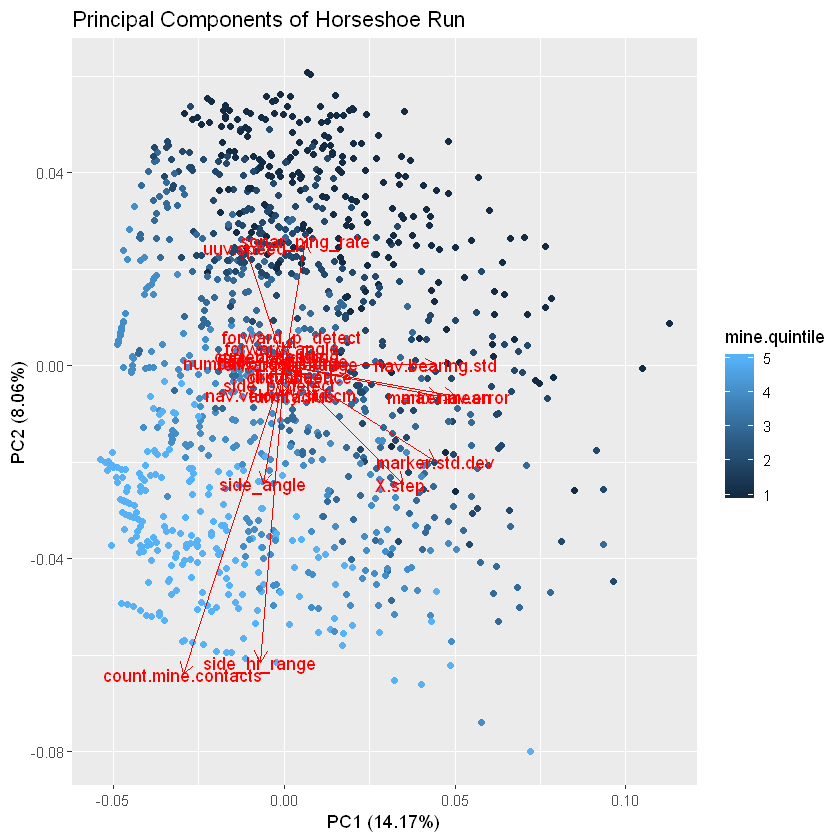

In [11]:
# PCA of input and output metrics
filtered.data.pca <- prcomp(filtered.data[c(2:13,15:18,20,24:28)], scale=TRUE)
#filtered.data.pca <- prcomp(filtered.data[c(2:13,15:18,25)], scale=TRUE)
autoplot(filtered.data.pca, data=data.quintiles, colour='mine.quintile', main="Principal Components of Horseshoe Run", loadings=TRUE, loadings.label=TRUE)

In [29]:
summary(filtered.data.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6   PC7
Standard deviation     1.7656 1.33198 1.18995 1.09016 1.04608 1.04369 1.038
Proportion of Variance 0.1417 0.08064 0.06436 0.05402 0.04974 0.04951 0.049
Cumulative Proportion  0.1417 0.22234 0.28670 0.34072 0.39046 0.43997 0.489
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.02992 1.01941 1.00522 0.99227 0.99089 0.97678 0.96621
Proportion of Variance 0.04822 0.04724 0.04593 0.04475 0.04463 0.04337 0.04243
Cumulative Proportion  0.53719 0.58443 0.63036 0.67511 0.71974 0.76311 0.80555
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.95849 0.92013 0.90787 0.83820 0.60356 0.53129 0.4619
Proportion of Variance 0.04176 0.03848 0.03747 0.03194 0.01656 0.01283 0.0097
Cumulative Proportion  0.84731 0.88579 0.92325 0.95519 0.97175 0.98458 0.9943
                          PC22
Standard de

In [30]:
filtered.data.pca
# PC1 - navigation/localization
# PC2 - negative mine detection
# PC3 - speed / mission time
# PC4 - obstacle avoidance

Standard deviations (1, .., p=22):
 [1] 1.7655754 1.3319813 1.1899507 1.0901601 1.0460774 1.0436886 1.0383084
 [8] 1.0299224 1.0194145 1.0052163 0.9922676 0.9908876 0.9767752 0.9662067
[15] 0.9584941 0.9201318 0.9078747 0.8382044 0.6035596 0.5312879 0.4618662
[22] 0.3548766

Rotation (n x k) = (22 x 22):
                              PC1          PC2          PC3          PC4
turn.radius           0.023926184 -0.057874190  0.011880697 -0.360120410
uuv.speed            -0.109597780  0.234845727 -0.674382031 -0.034765891
nav.bearing.std       0.425203282  0.002194105 -0.222813774  0.043453265
nav.velocity.std.cm  -0.007790011 -0.057643765 -0.029349476  0.179949559
max.obs.dist         -0.045555463  0.018187503  0.047747982 -0.047742000
obs.influence         0.042551639 -0.020478837  0.101294070 -0.045270015
sonar_ping_rate       0.060031029  0.246938031  0.030465670 -0.310475523
side_angle           -0.057881765 -0.233013534 -0.119272114  0.110784167
side_low_range        0.002788776  0.

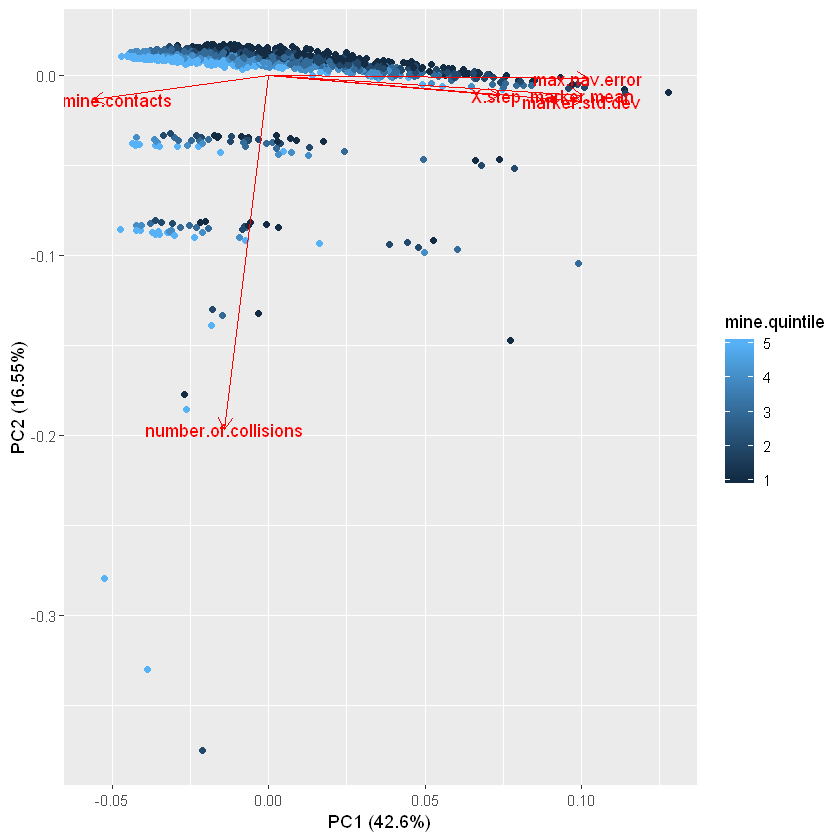

In [20]:
# PCA of the output metrics
out.data.pca <- prcomp(filtered.data[c(20,24:28)], scale=TRUE)
autoplot(out.data.pca, data=data.quintiles, colour='mine.quintile', loadings=TRUE, loadings.label=TRUE)

In [26]:
summary(out.data.pca)
out.data.pca

Importance of components:
                         PC1    PC2    PC3    PC4     PC5    PC6
Standard deviation     1.599 0.9965 0.9773 0.9428 0.59667 0.5008
Proportion of Variance 0.426 0.1655 0.1592 0.1482 0.05934 0.0418
Cumulative Proportion  0.426 0.5915 0.7507 0.8989 0.95820 1.0000

Standard deviations (1, .., p=6):
[1] 1.5987761 0.9965174 0.9772936 0.9428351 0.5966688 0.5008129

Rotation (n x k) = (6 x 6):
                             PC1          PC2         PC3         PC4
X.step.               0.37189444 -0.057495450  0.69480809 -0.30900125
number.of.collisions -0.07218832 -0.991745106 -0.06307005 -0.08209591
max.nav.error         0.51618179 -0.007386015  0.18642940 -0.29362732
count.mine.contacts  -0.28354476 -0.067070007  0.63852021  0.64838601
marker.mean           0.50547660 -0.055232847 -0.24193020  0.39813315
marker.std.dev        0.50411855 -0.074379511 -0.11076865  0.48233501
                             PC5         PC6
X.step.               0.50633271  0.15419447
number.of.collisions -0.01979942 -0.01099557
max.nav.error        -0.72585028 -0.29269480
count.mine.contacts  -0.22006038 -0.19637957
marker.mean           0.38432606 -0.61375565
marker.std.dev       -0.14227944  0.68932720

In [27]:
summary(filtered.data[c(20,24:28)])

    X.step.      number.of.collisions max.nav.error      count.mine.contacts
 Min.   : 2147   Min.   :0.0000       Min.   :   4.393   Min.   :  0.00     
 1st Qu.: 2796   1st Qu.:0.0000       1st Qu.: 941.911   1st Qu.: 40.00     
 Median : 3998   Median :0.0000       Median :1817.646   Median : 86.50     
 Mean   : 5536   Mean   :0.1779       Mean   :2029.267   Mean   : 93.77     
 3rd Qu.: 6875   3rd Qu.:0.0000       3rd Qu.:3007.275   3rd Qu.:147.25     
 Max.   :19874   Max.   :8.0000       Max.   :5589.648   Max.   :200.00     
  marker.mean     marker.std.dev  
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 36.40   1st Qu.: 23.58  
 Median : 76.33   Median : 45.09  
 Mean   :103.20   Mean   : 64.65  
 3rd Qu.:134.03   3rd Qu.: 83.80  
 Max.   :641.92   Max.   :371.23  